In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [56]:
df_train=pd.read_csv(r"D:\walmart-recruiting-store-sales-forecasting\train_features.csv")
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Macro_Trend  \
0       2.572        0.0        0.0        0.0  ...     1.296640   
1       2.548        0.0        0.0        0.0  ...     1.303976   
2       2.514        0.0        0.0        0.0  ...     1.306097   
3       2.561        0.0        0.0        0.0  ...     1.306874   
4       2.625        0.0        0.0        0.0  ...     1.308197   

   WeekBeforeHoliday  WeekAfterHoliday  MarkDown1_missing MarkDown2_missing  \
0                  1                 0                  1                 1   
1                  0                 0                  1                 1   
2                  0                 1                  1                 1   
3                  0                 0                  1                 1   
4                  0                 0                  1                 1   

   MarkDown3_missing  MarkDown4_missing  MarkDown5_missing  Total_MarkDown  \
0                  1                  1                  1             0.0   
1                  1                  1                  1             0.0   
2                  1                  1                  1             0.0   
3                  1                  1                  1             0.0   
4                  1                  1                  1             0.0   

   Any_MarkDown  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 29 columns]

In [57]:
df_test=pd.read_csv(r"D:\walmart-recruiting-store-sales-forecasting\test_features.csv")
df_test.head()

Store  Dept        Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0      1     1  02-11-2012        False        55.32       3.386    6766.44   
1      1     1  09-11-2012        False        61.24       3.314   11421.32   
2      1     1  16-11-2012        False        52.92       3.252    9696.28   
3      1     1  23-11-2012         True        56.23       3.211     883.59   
4      1     1  30-11-2012        False        52.34       3.207    2460.03   

   MarkDown2  MarkDown3  MarkDown4  ...  Macro_Trend  WeekBeforeHoliday  \
0    5147.70      50.82    3639.90  ...     1.245332                  0   
1    3370.89      40.28    4646.79  ...     1.249649                  0   
2     292.10     103.78    1133.15  ...     1.252757                  1   
3       4.17   74910.32     209.91  ...     1.253687                  0   
4       0.00    3838.35     150.57  ...     1.260156                  0   

   WeekAfterHoliday MarkDown1_missing  MarkDown2_missing  MarkDown3_missing  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 1                 0                  1                  0   

   MarkDown4_missing  MarkDown5_missing  Total_MarkDown  Any_MarkDown  
0                  0                  0        18342.28             1  
1                  0                  0        25633.44             1  
2                  0                  0        17838.00             1  
3                  0                  0        76311.31             1  
4                  0                  0        13415.29             1  

[5 rows x 28 columns]

In [59]:
df_train=df_train.drop_duplicates()
df_test=df_test.drop_duplicates()
print(f"the shape of train {df_train.shape} and the shape of test {df_test.shape}")

the shape of train (421570, 29) and the shape of test (115064, 28)


In [66]:
numeric_cols_train = df_train.select_dtypes(include=["number"]).columns
numeric_cols_test = df_test.select_dtypes(include=["number"]).columns

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


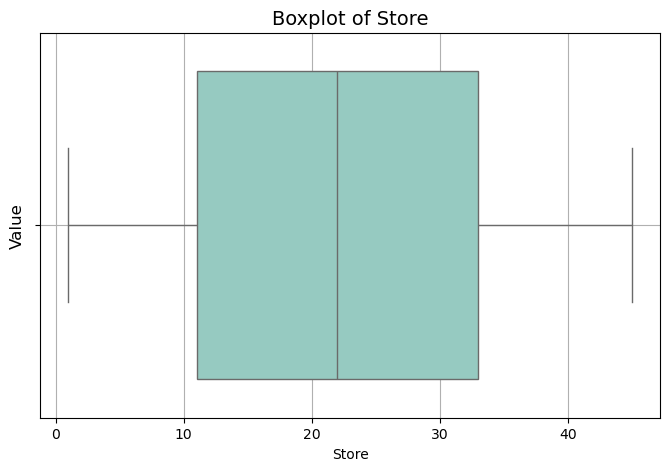

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


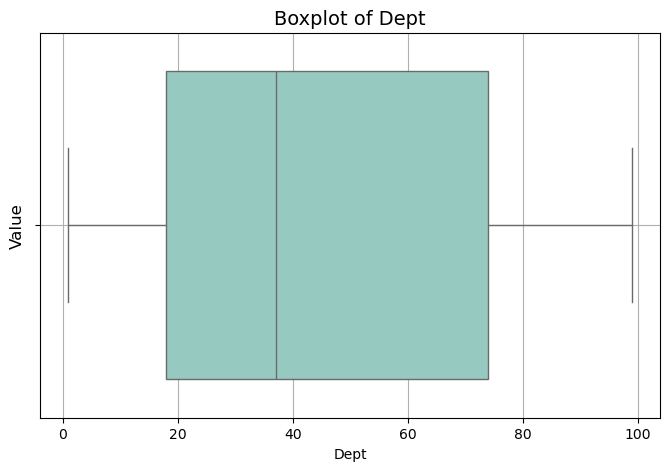

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


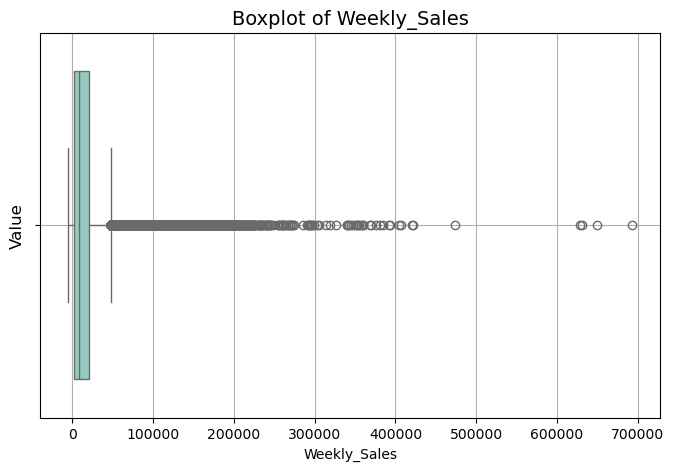

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


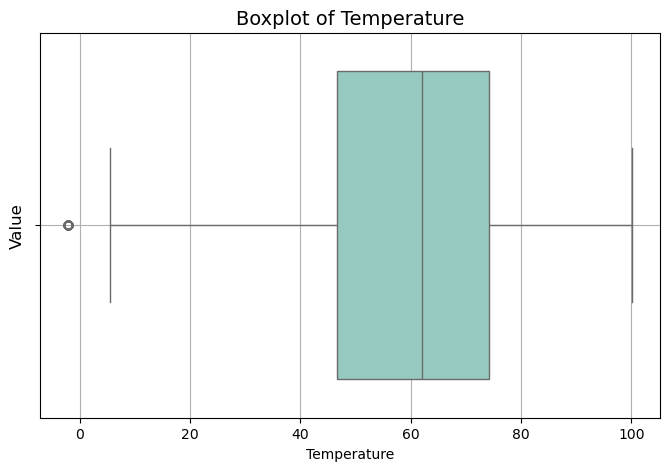

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


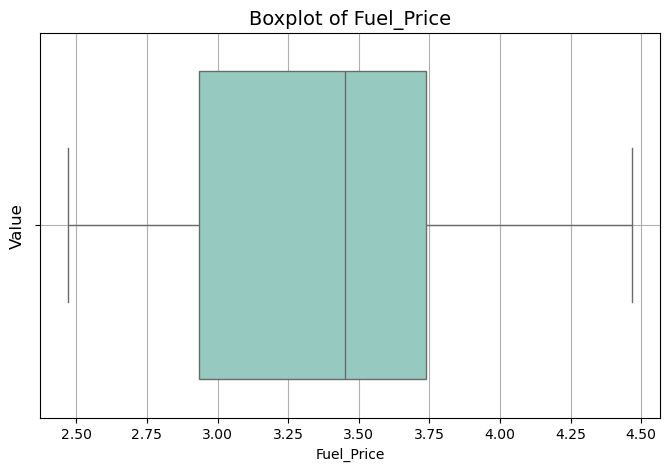

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


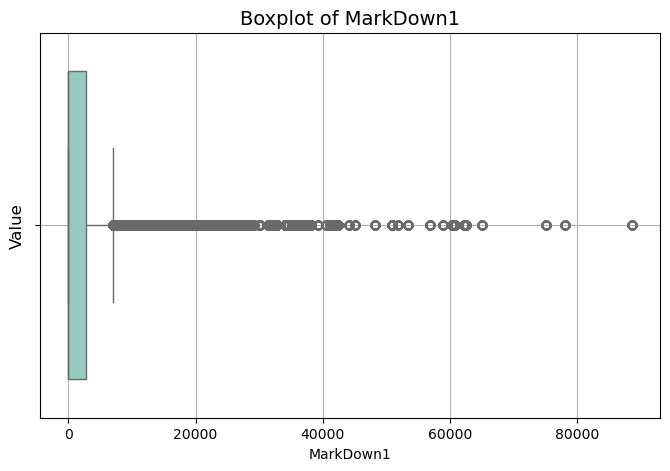

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


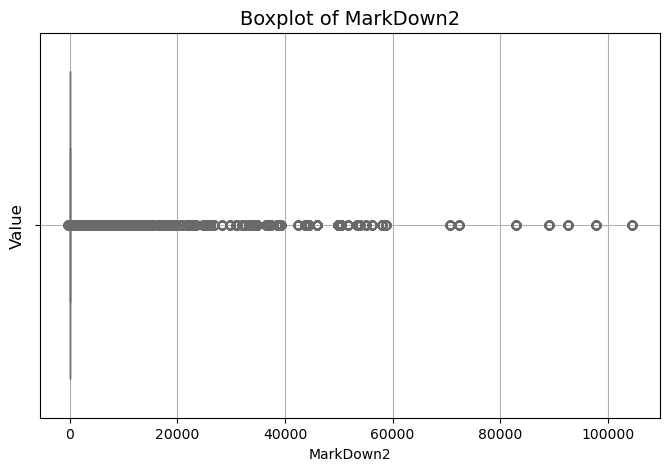

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


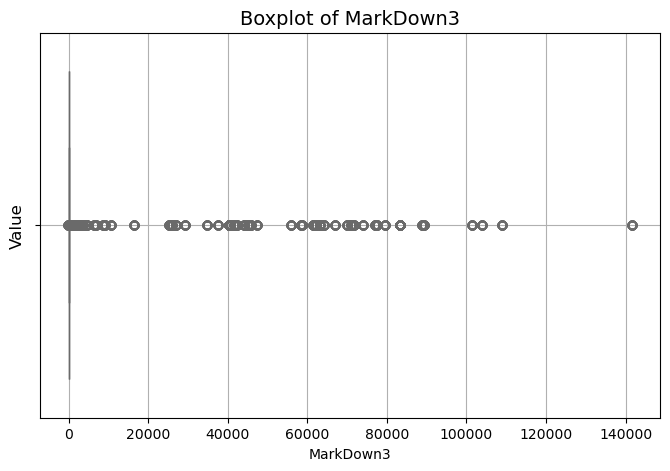

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


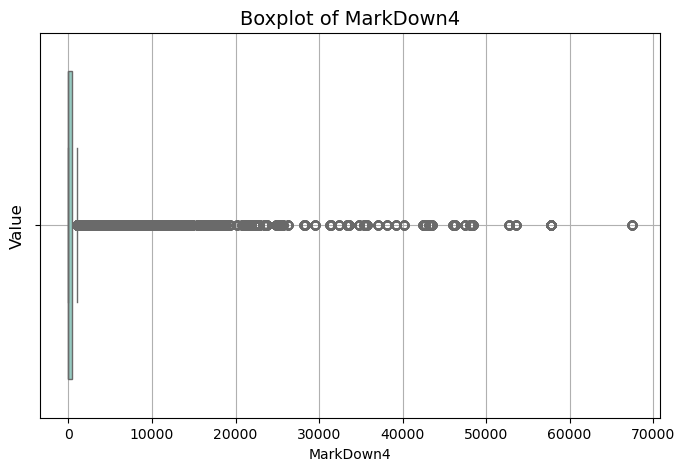

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


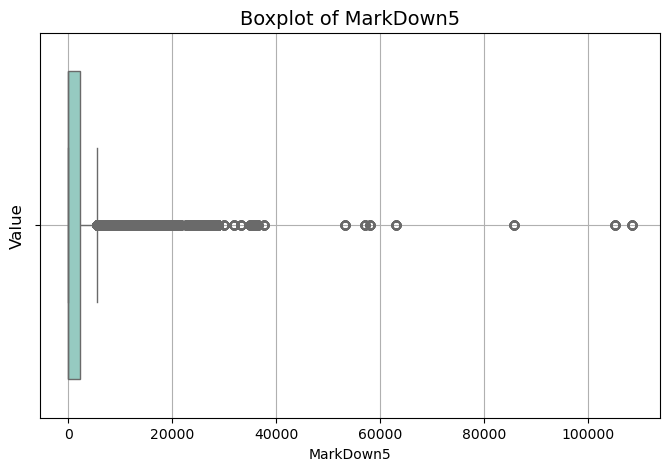

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


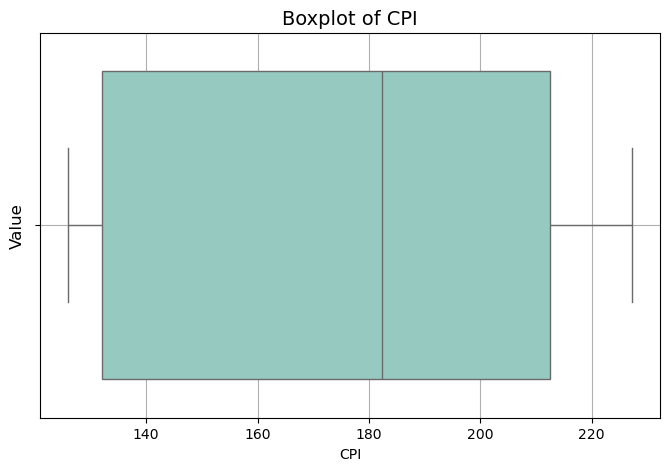

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


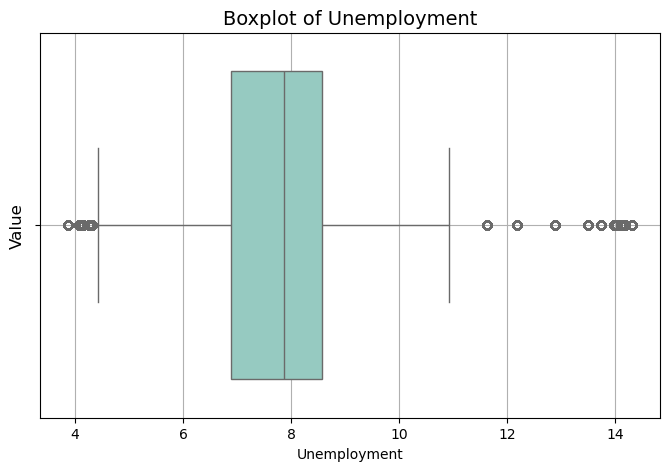

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


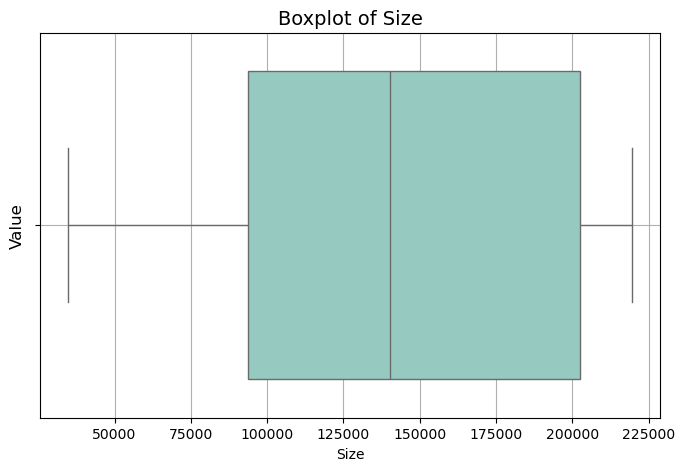

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


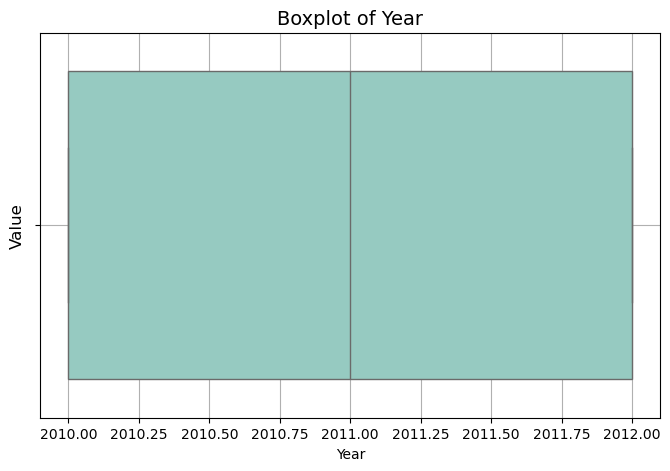

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


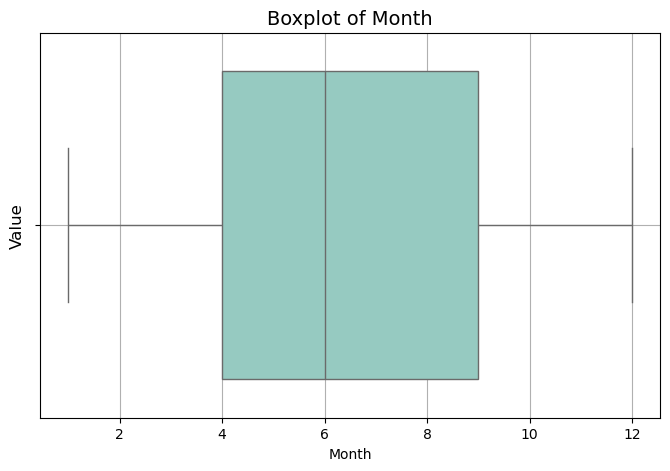

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


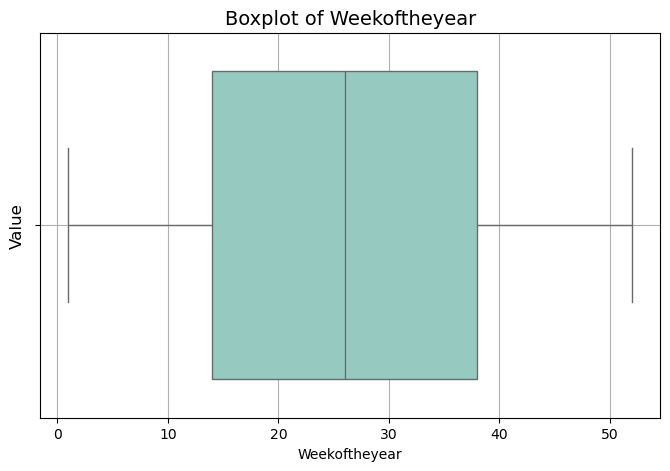

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


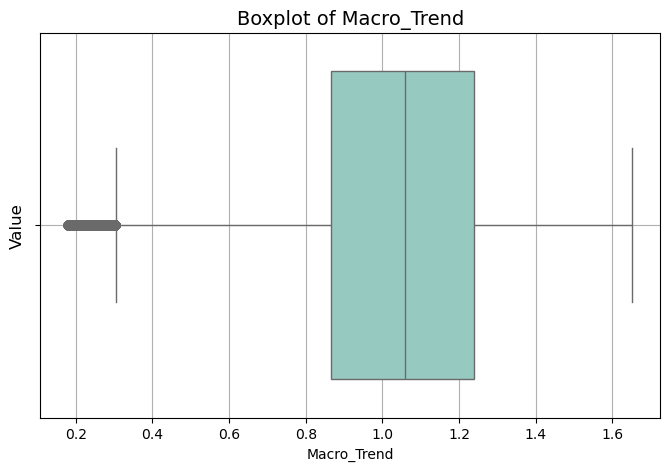

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


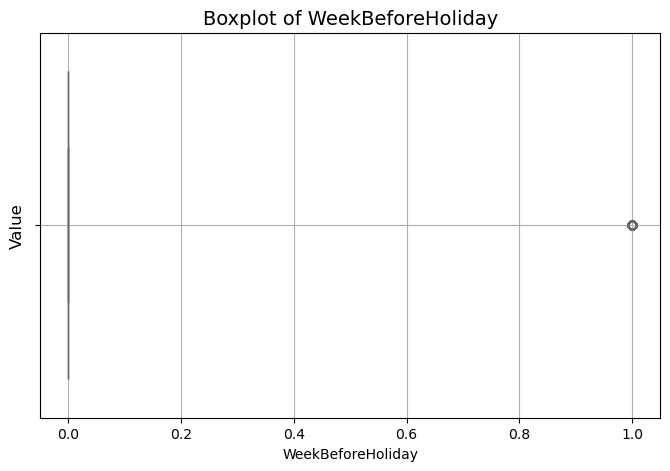

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


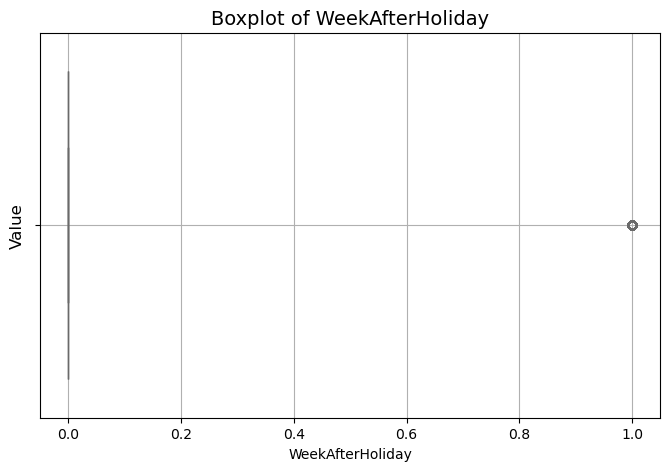

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


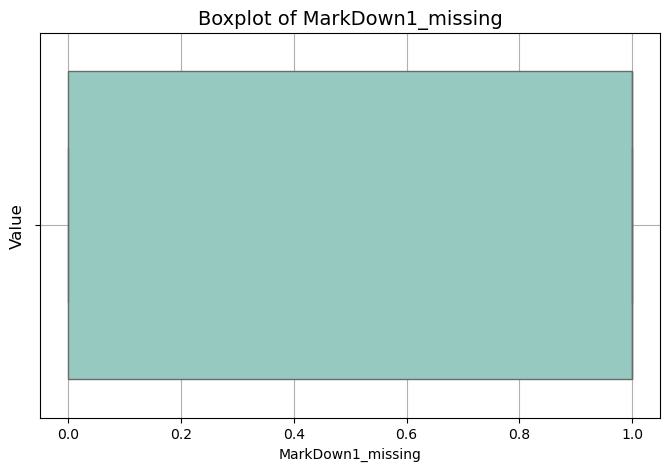

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


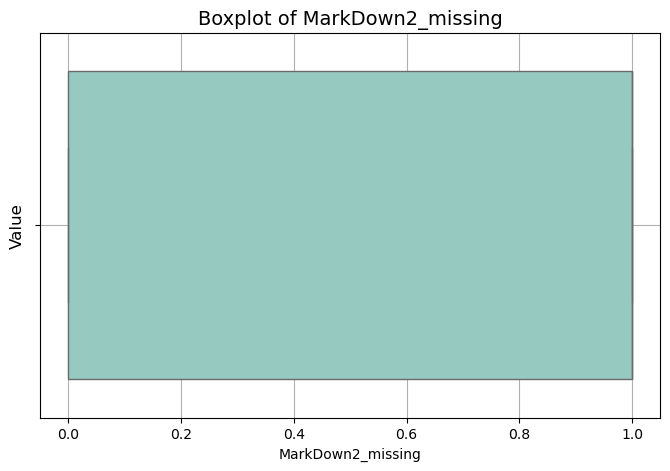

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


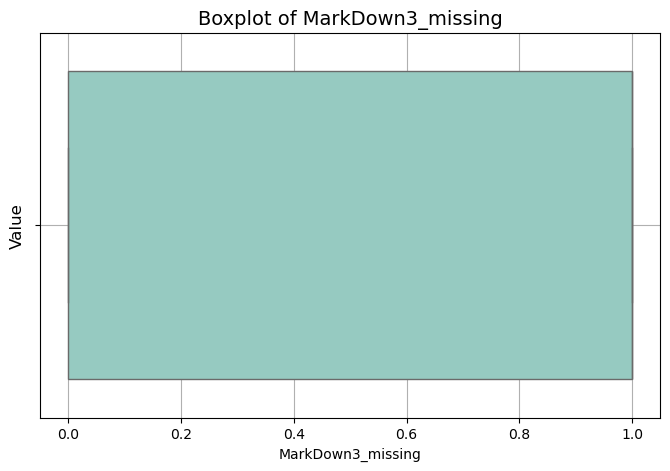

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


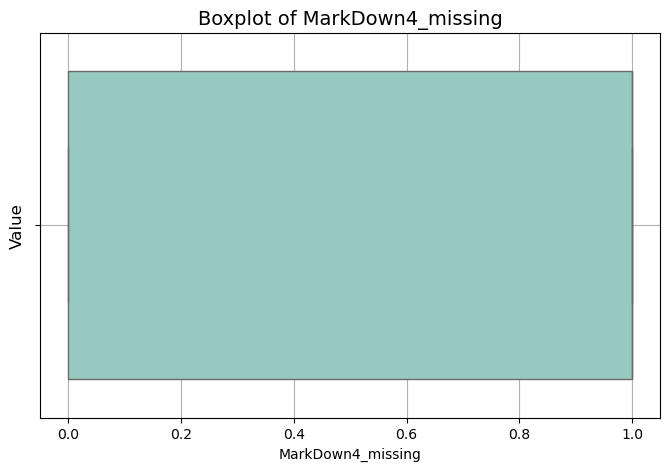

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


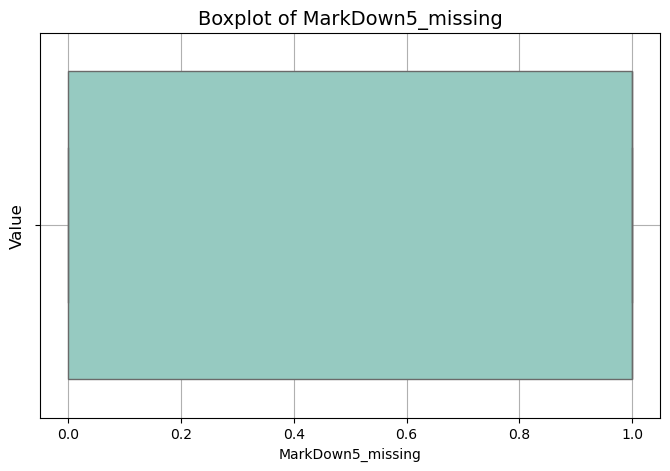

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


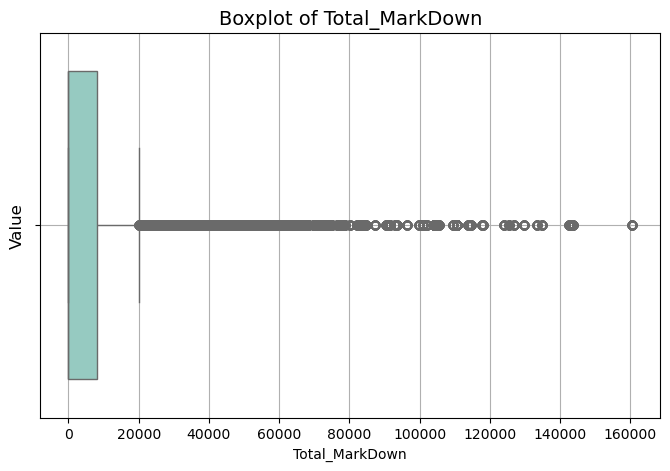

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2440063691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


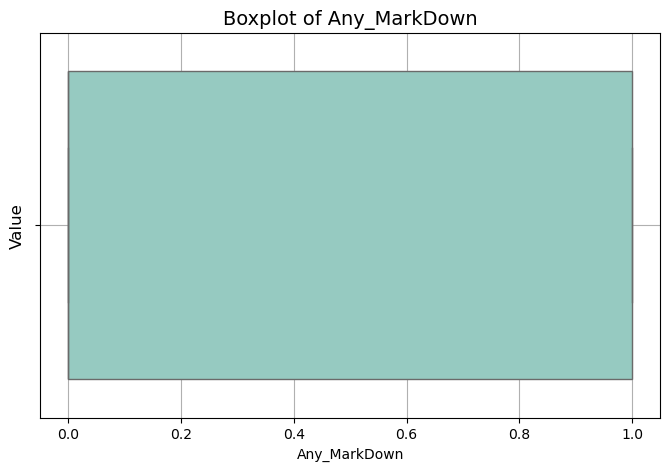

In [61]:
for column in numeric_cols_train:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_train, x=column, palette="Set3")
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True)
    plt.show()

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


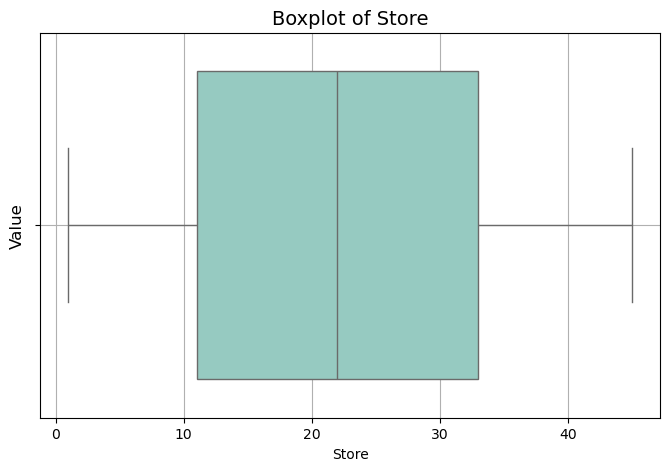

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


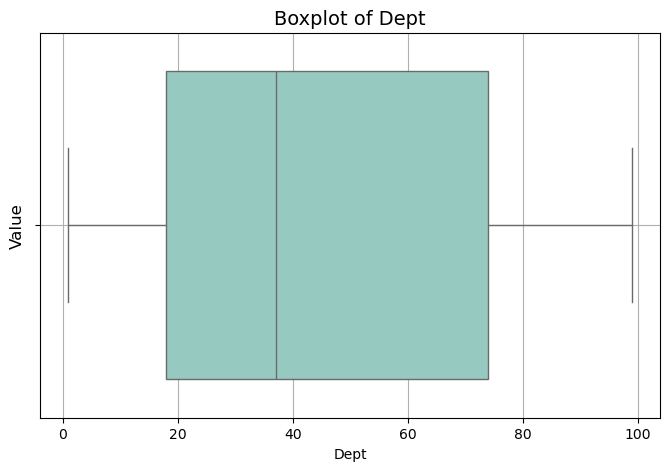

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


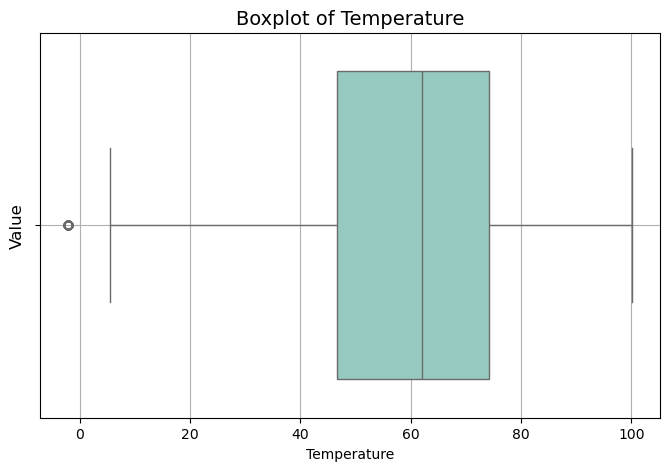

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


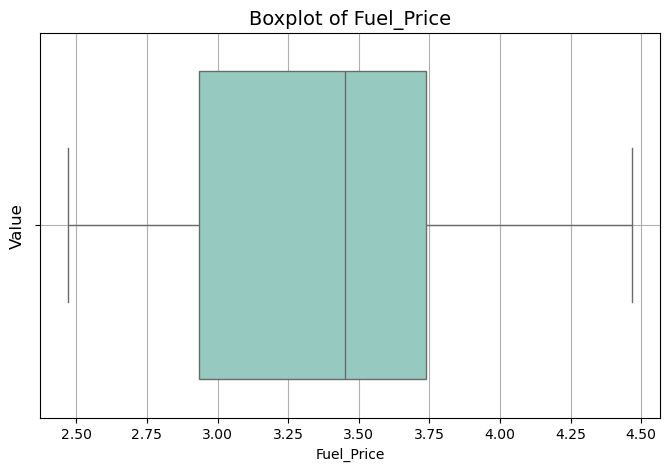

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


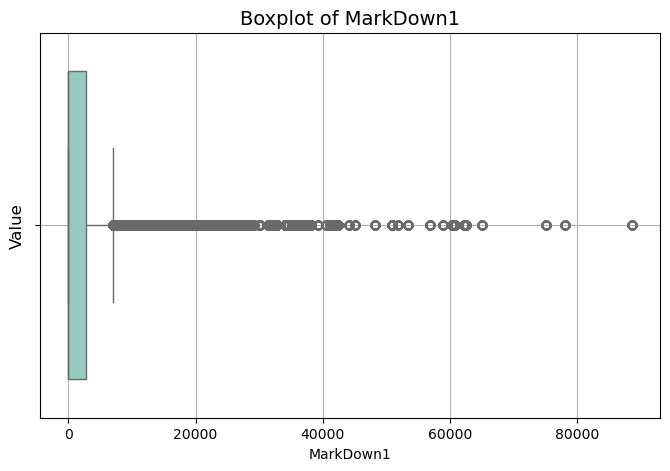

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


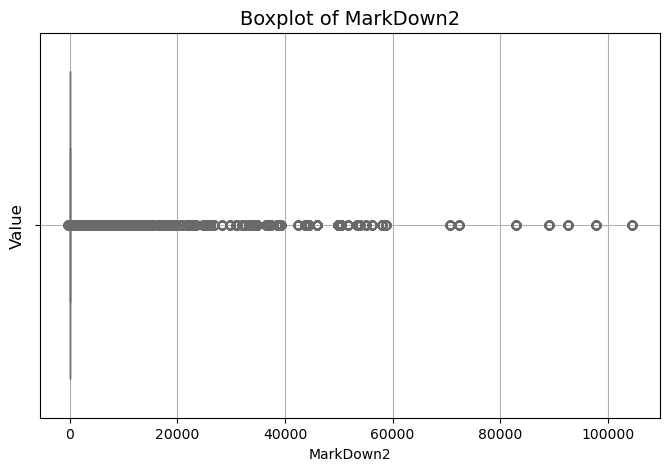

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


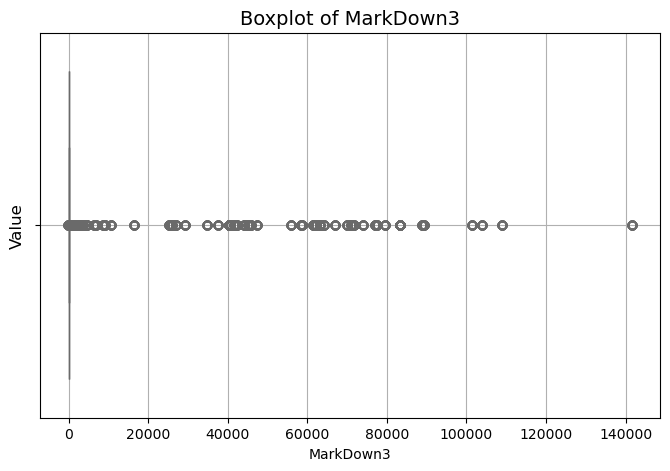

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


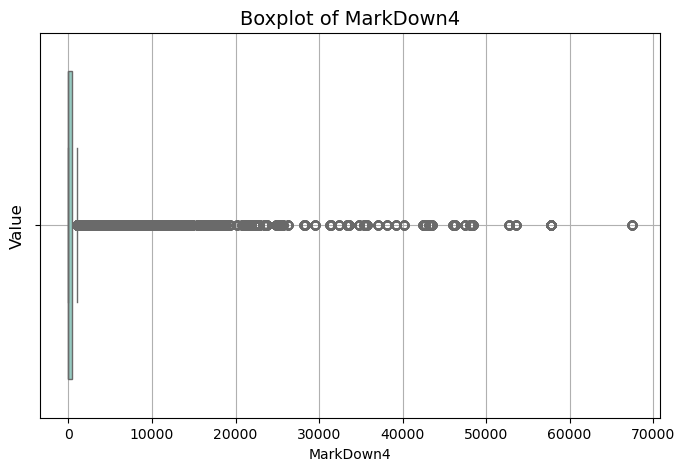

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


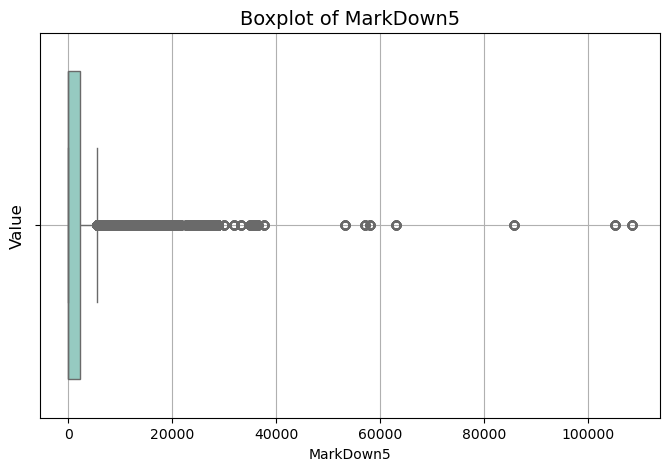

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


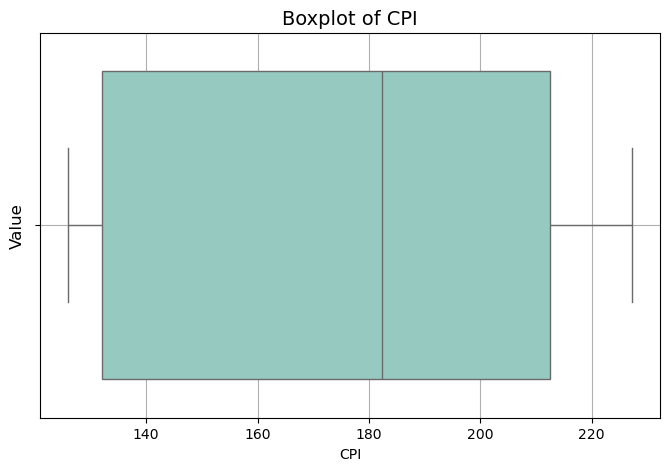

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


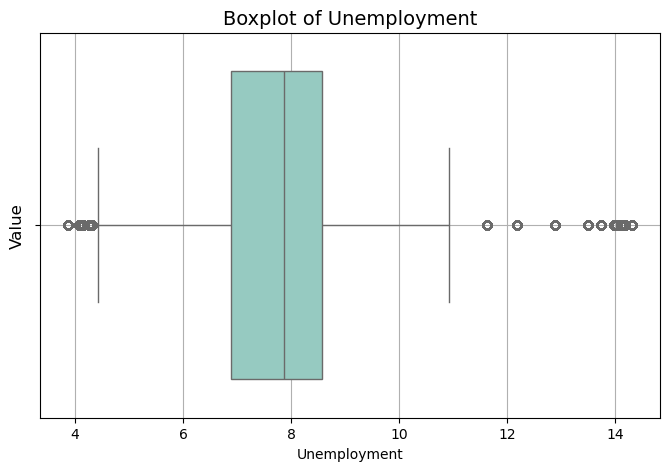

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


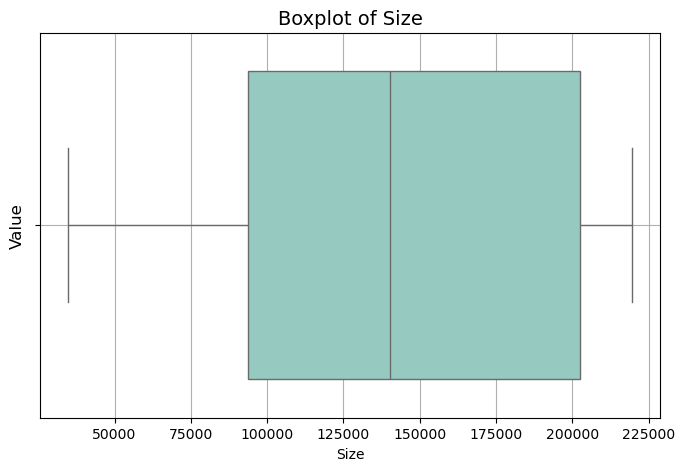

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


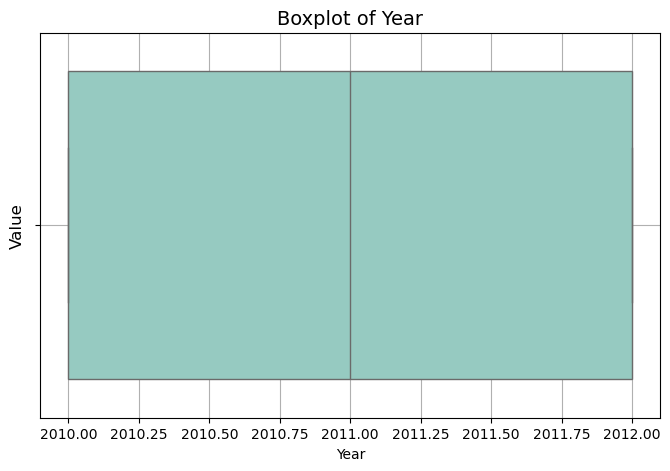

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


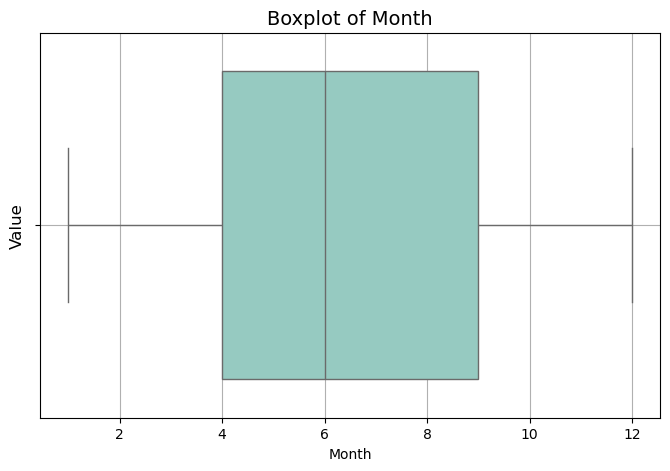

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


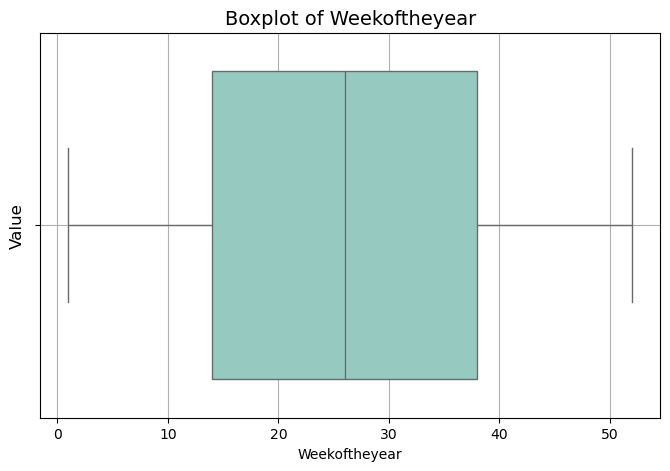

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


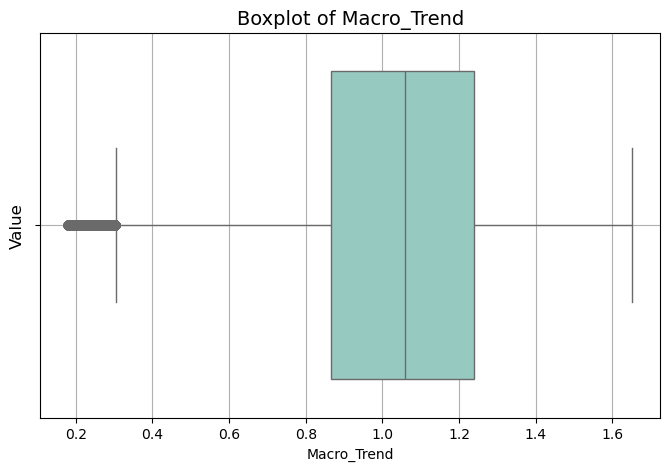

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


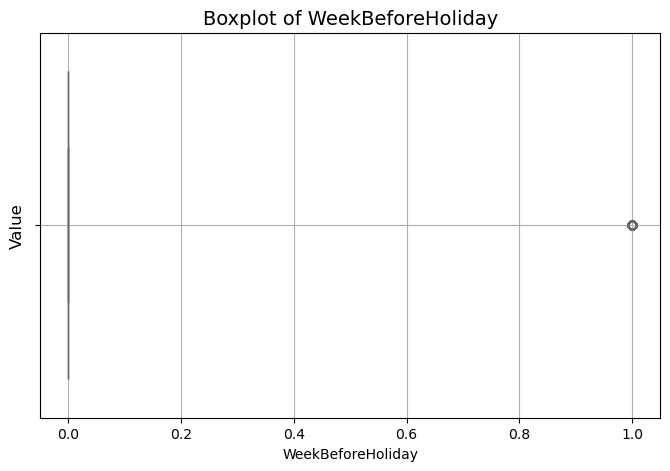

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


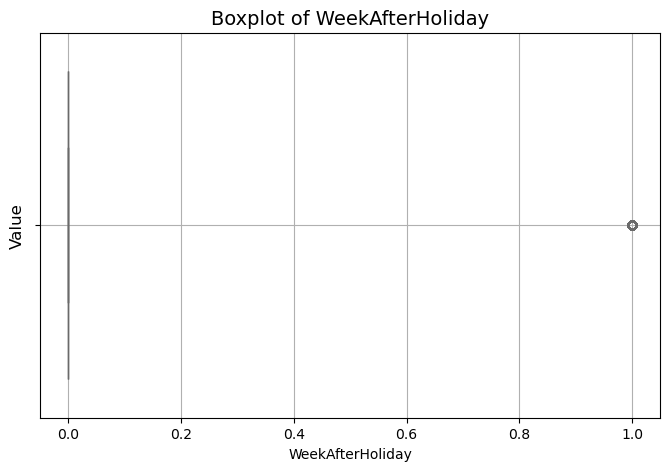

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


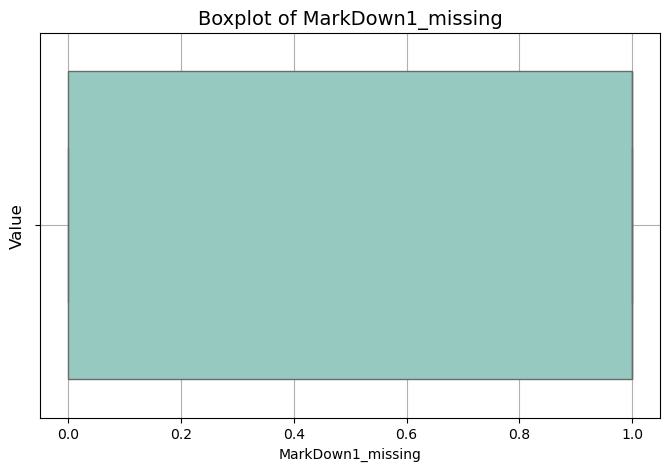

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


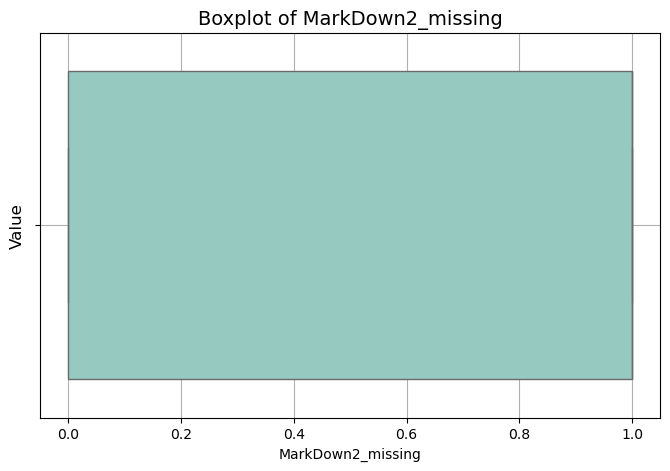

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


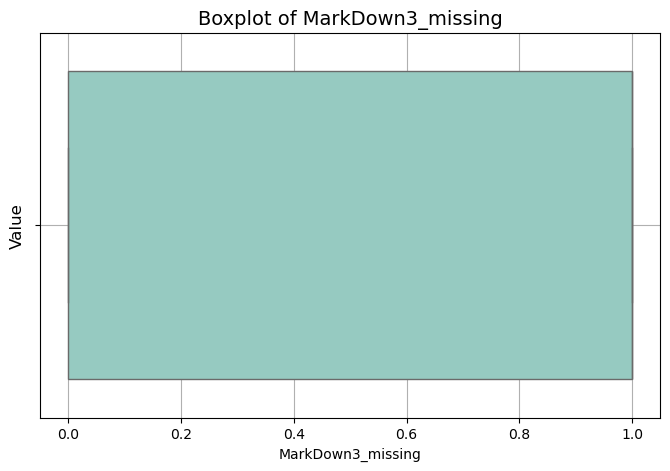

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


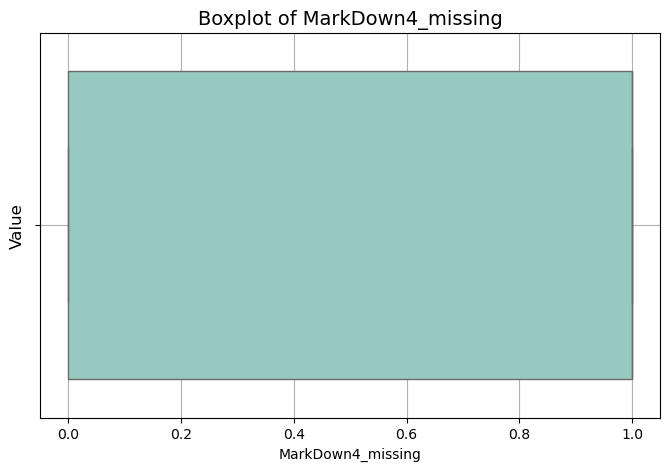

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


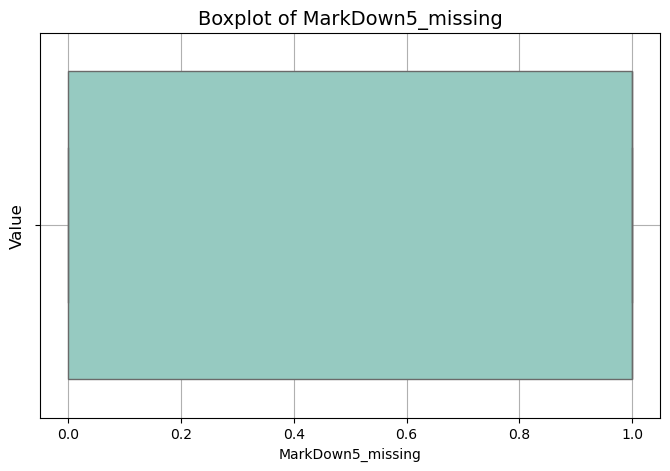

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


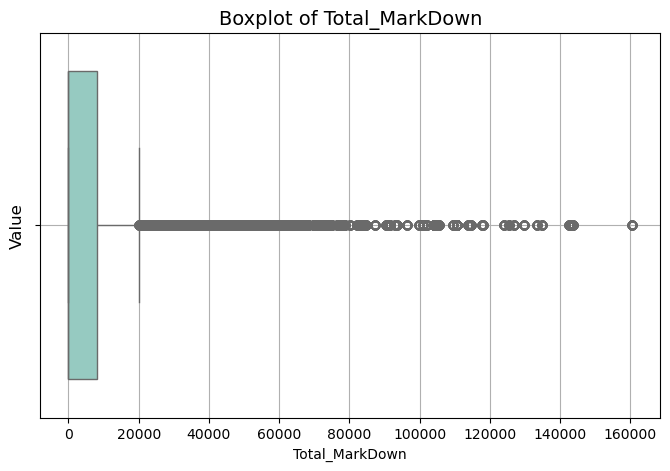

C:\Users\CYBORG_15\AppData\Local\Temp\ipykernel_7228\2065957322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, palette="Set3")


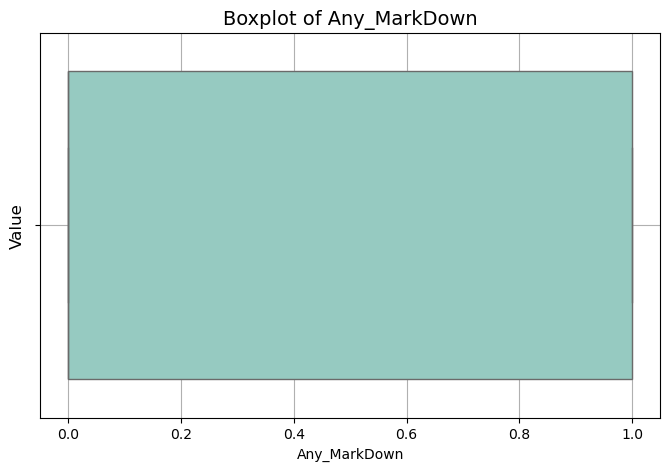

In [ ]:
for column in numeric_cols_test:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_train, x=column, palette="Set3")
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True)
    plt.show()

In [68]:
null_count_num_train = df_train[numeric_cols_train].isnull().sum()
null_count_num_train

Store                0
Dept                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Size                 0
Year                 0
Month                0
Weekoftheyear        0
Macro_Trend          0
WeekBeforeHoliday    0
WeekAfterHoliday     0
MarkDown1_missing    0
MarkDown2_missing    0
MarkDown3_missing    0
MarkDown4_missing    0
MarkDown5_missing    0
Total_MarkDown       0
Any_MarkDown         0
dtype: int64

In [69]:
null_count_num_test = df_test[numeric_cols_test].isnull().sum()
null_count_num_test

Store                    0
Dept                     0
Temperature              0
Fuel_Price               0
MarkDown1                0
MarkDown2                0
MarkDown3                0
MarkDown4                0
MarkDown5                0
CPI                  38162
Unemployment         38162
Size                     0
Year                     0
Month                    0
Weekoftheyear            0
Macro_Trend          38162
WeekBeforeHoliday        0
WeekAfterHoliday         0
MarkDown1_missing        0
MarkDown2_missing        0
MarkDown3_missing        0
MarkDown4_missing        0
MarkDown5_missing        0
Total_MarkDown           0
Any_MarkDown             0
dtype: int64

In [78]:
for col in ["CPI", "Unemployment", "Macro_Trend"]:
    df_test[col] = df_test.groupby("Store")[col].transform(
        lambda x: x.fillna(x.median())
    )
df_test[numeric_cols_test].isna().sum()

Store                0
Dept                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Size                 0
Year                 0
Month                0
Weekoftheyear        0
Macro_Trend          0
WeekBeforeHoliday    0
WeekAfterHoliday     0
MarkDown1_missing    0
MarkDown2_missing    0
MarkDown3_missing    0
MarkDown4_missing    0
MarkDown5_missing    0
Total_MarkDown       0
Any_MarkDown         0
dtype: int64

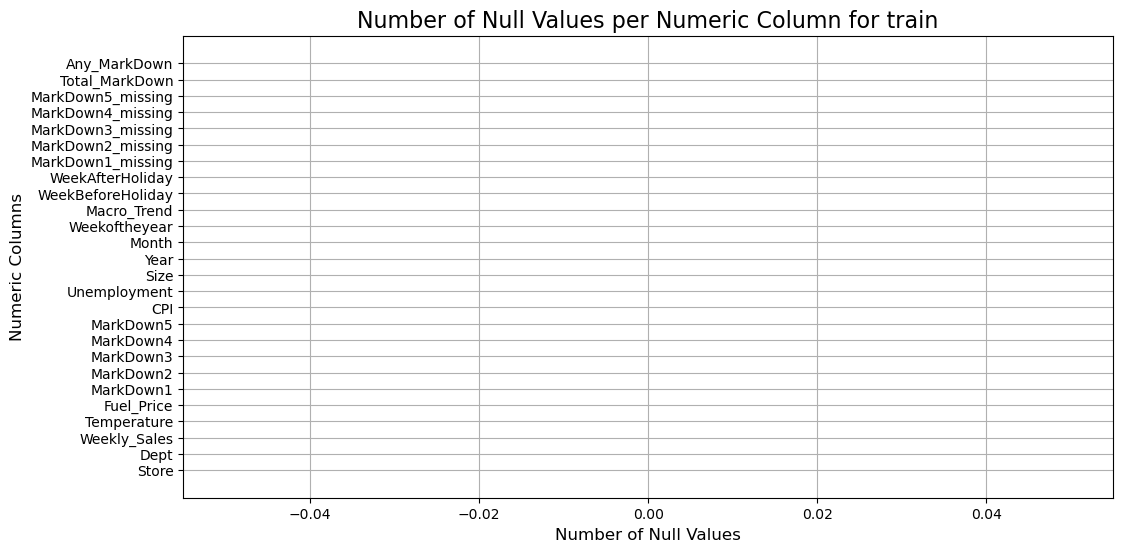

In [75]:
plt.figure(figsize=(12, 6))
plt.barh(null_count_num_train.index, null_count_num_train.values, color="skyblue")
plt.title('Number of Null Values per Numeric Column for train', fontsize=16)
plt.ylabel('Numeric Columns', fontsize=12)
plt.xlabel('Number of Null Values', fontsize=12)
plt.grid(True)
plt.show()

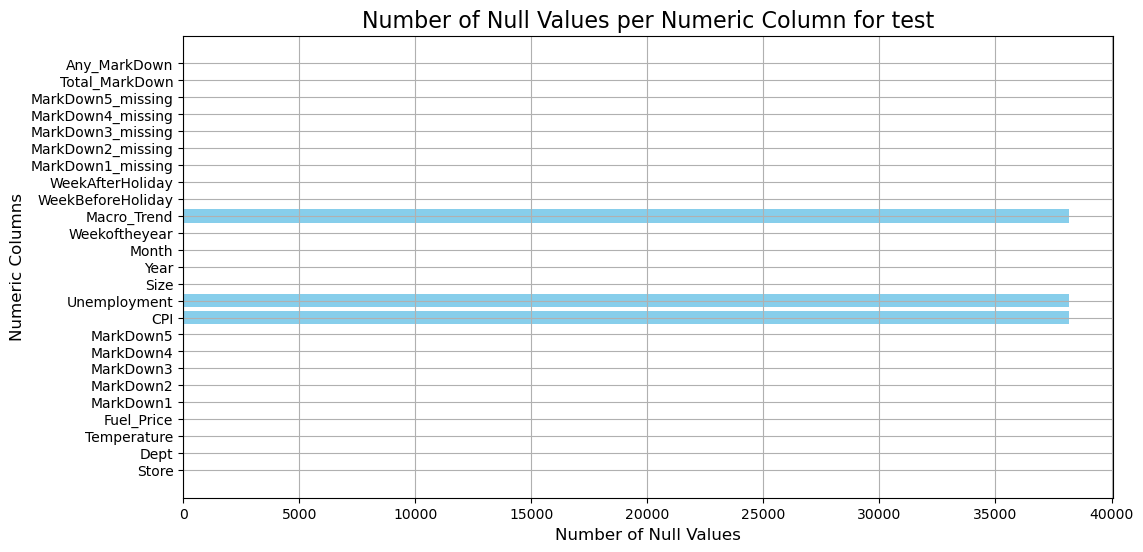

In [80]:
plt.figure(figsize=(12, 6))
plt.barh(null_count_num_test.index, null_count_num_test.values, color="skyblue")
plt.title('Number of Null Values per Numeric Column for test', fontsize=16)
plt.ylabel('Numeric Columns', fontsize=12)
plt.xlabel('Number of Null Values', fontsize=12)
plt.grid(True)
plt.show()

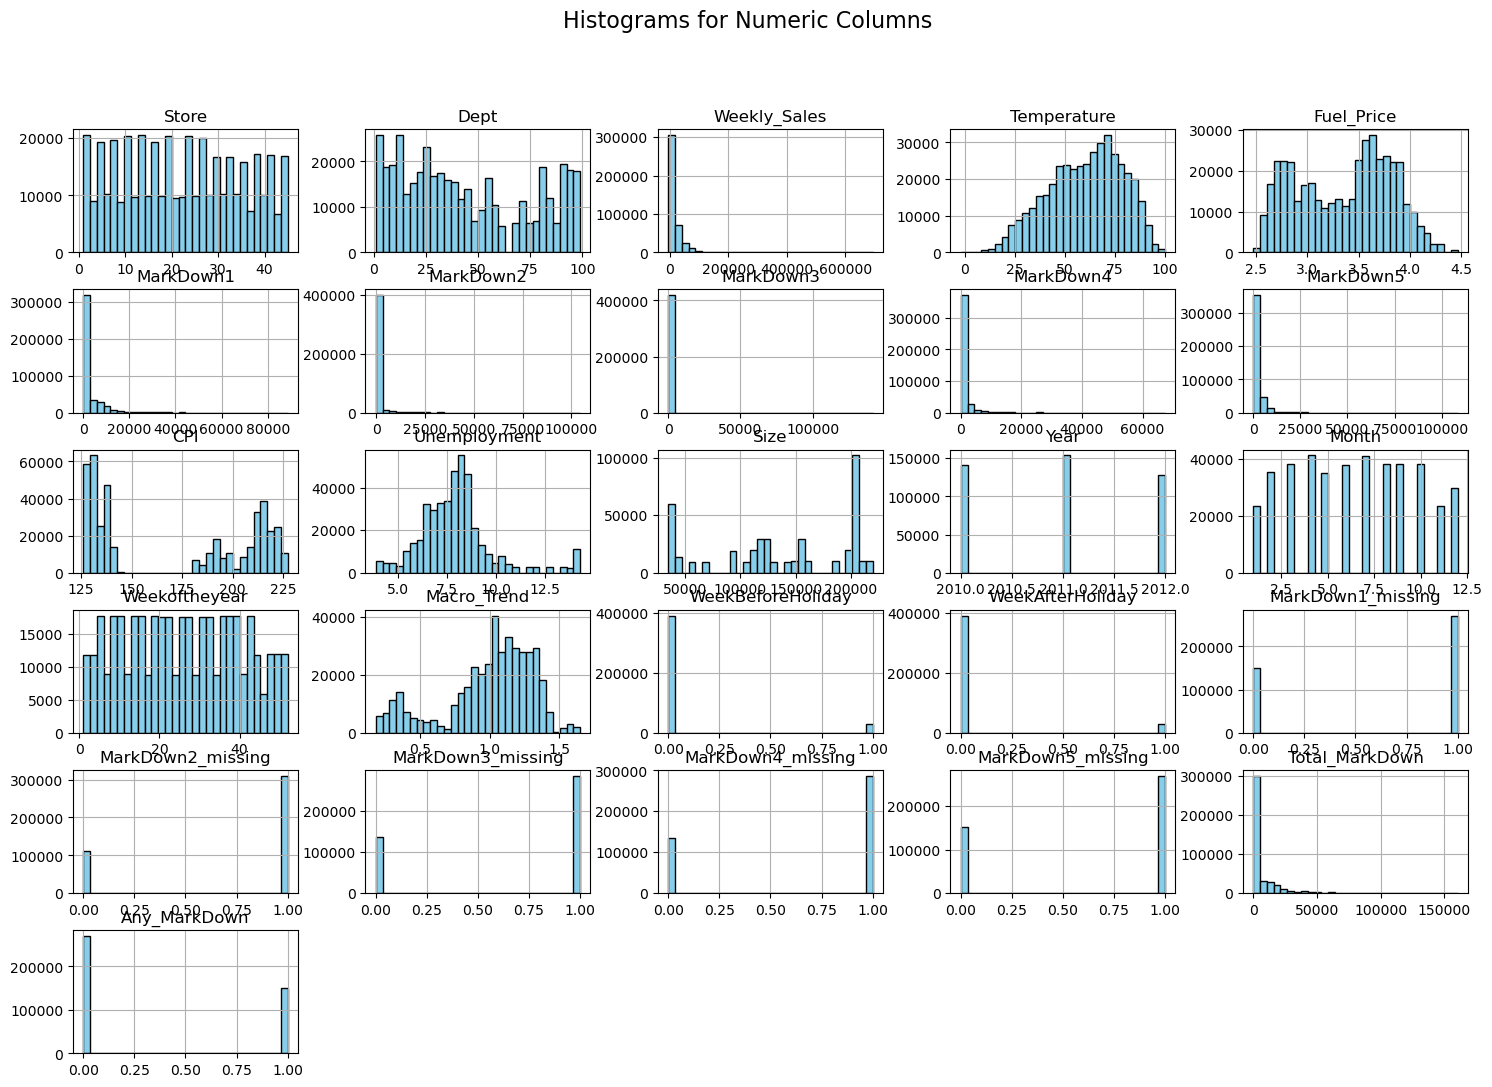

In [72]:
df_train[numeric_cols_train].hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numeric Columns', fontsize=16)
plt.show()

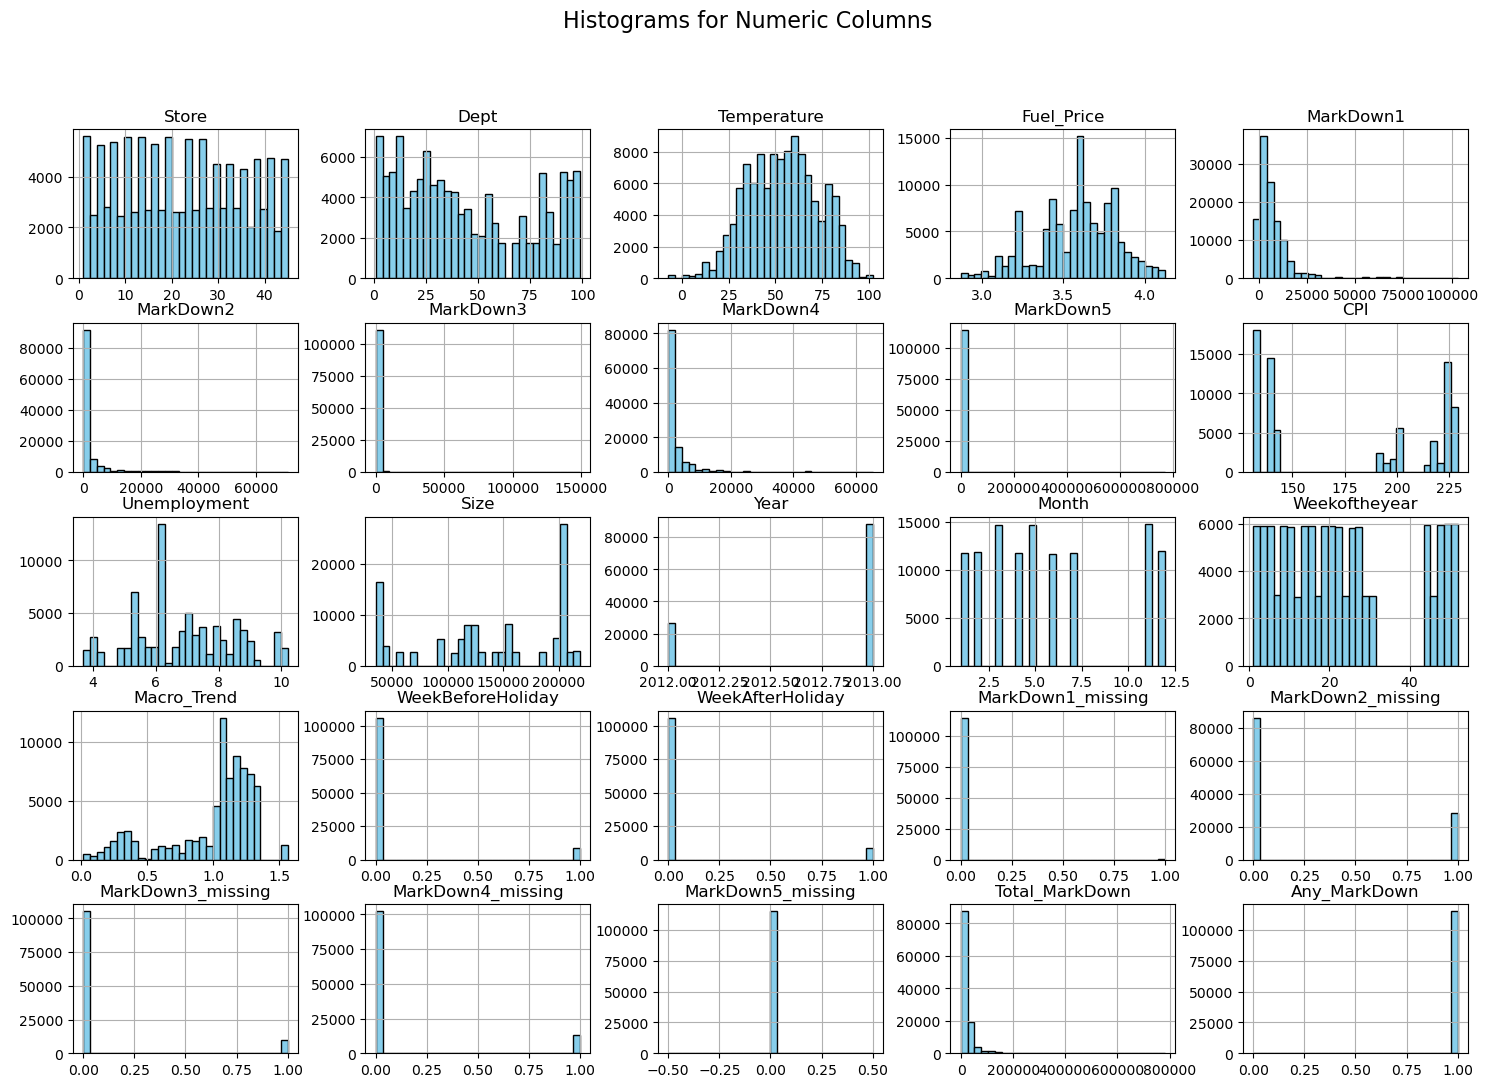

In [73]:
df_test[numeric_cols_test].hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numeric Columns', fontsize=16)
plt.show()

In [81]:
Q1=df_train[numeric_cols_train].quantile(0.25)
Q3=df_train[numeric_cols_train].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1- 1.5 * IQR
upper_bound=Q3+ 1.5 * IQR
outliers = (df_train[numeric_cols_train] < lower_bound) | (df_train[numeric_cols_train] > upper_bound)
print("Number of outliers per column for train:")
print(outliers.sum())

Number of outliers per column for train:
Store                     0
Dept                      0
Weekly_Sales          35521
Temperature              69
Fuel_Price                0
MarkDown1             55789
MarkDown2            103148
MarkDown3             84674
MarkDown4             79134
MarkDown5             40458
CPI                       0
Unemployment          32114
Size                      0
Year                      0
Month                     0
Weekoftheyear             0
Macro_Trend           16303
WeekBeforeHoliday     29575
WeekAfterHoliday      29635
MarkDown1_missing         0
MarkDown2_missing         0
MarkDown3_missing         0
MarkDown4_missing         0
MarkDown5_missing         0
Total_MarkDown        44405
Any_MarkDown              0
dtype: int64


In [82]:
Q1=df_test[numeric_cols_test].quantile(0.25)
Q3=df_test[numeric_cols_test].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1- 1.5 * IQR
upper_bound=Q3+ 1.5 * IQR
outliers = (df_test[numeric_cols_test] < lower_bound) | (df_test[numeric_cols_test] > upper_bound)
print("Number of outliers per column for train:")
print(outliers.sum())

Number of outliers per column for train:
Store                    0
Dept                     0
Temperature            208
Fuel_Price             939
MarkDown1             6783
MarkDown2            16884
MarkDown3            12610
MarkDown4            13070
MarkDown5             7232
CPI                      0
Unemployment             0
Size                     0
Year                 26789
Month                    0
Weekoftheyear            0
Macro_Trend          15698
WeekBeforeHoliday     8892
WeekAfterHoliday      8913
MarkDown1_missing      149
MarkDown2_missing    28627
MarkDown3_missing     9829
MarkDown4_missing    12888
MarkDown5_missing        0
Total_MarkDown        7953
Any_MarkDown            93
dtype: int64


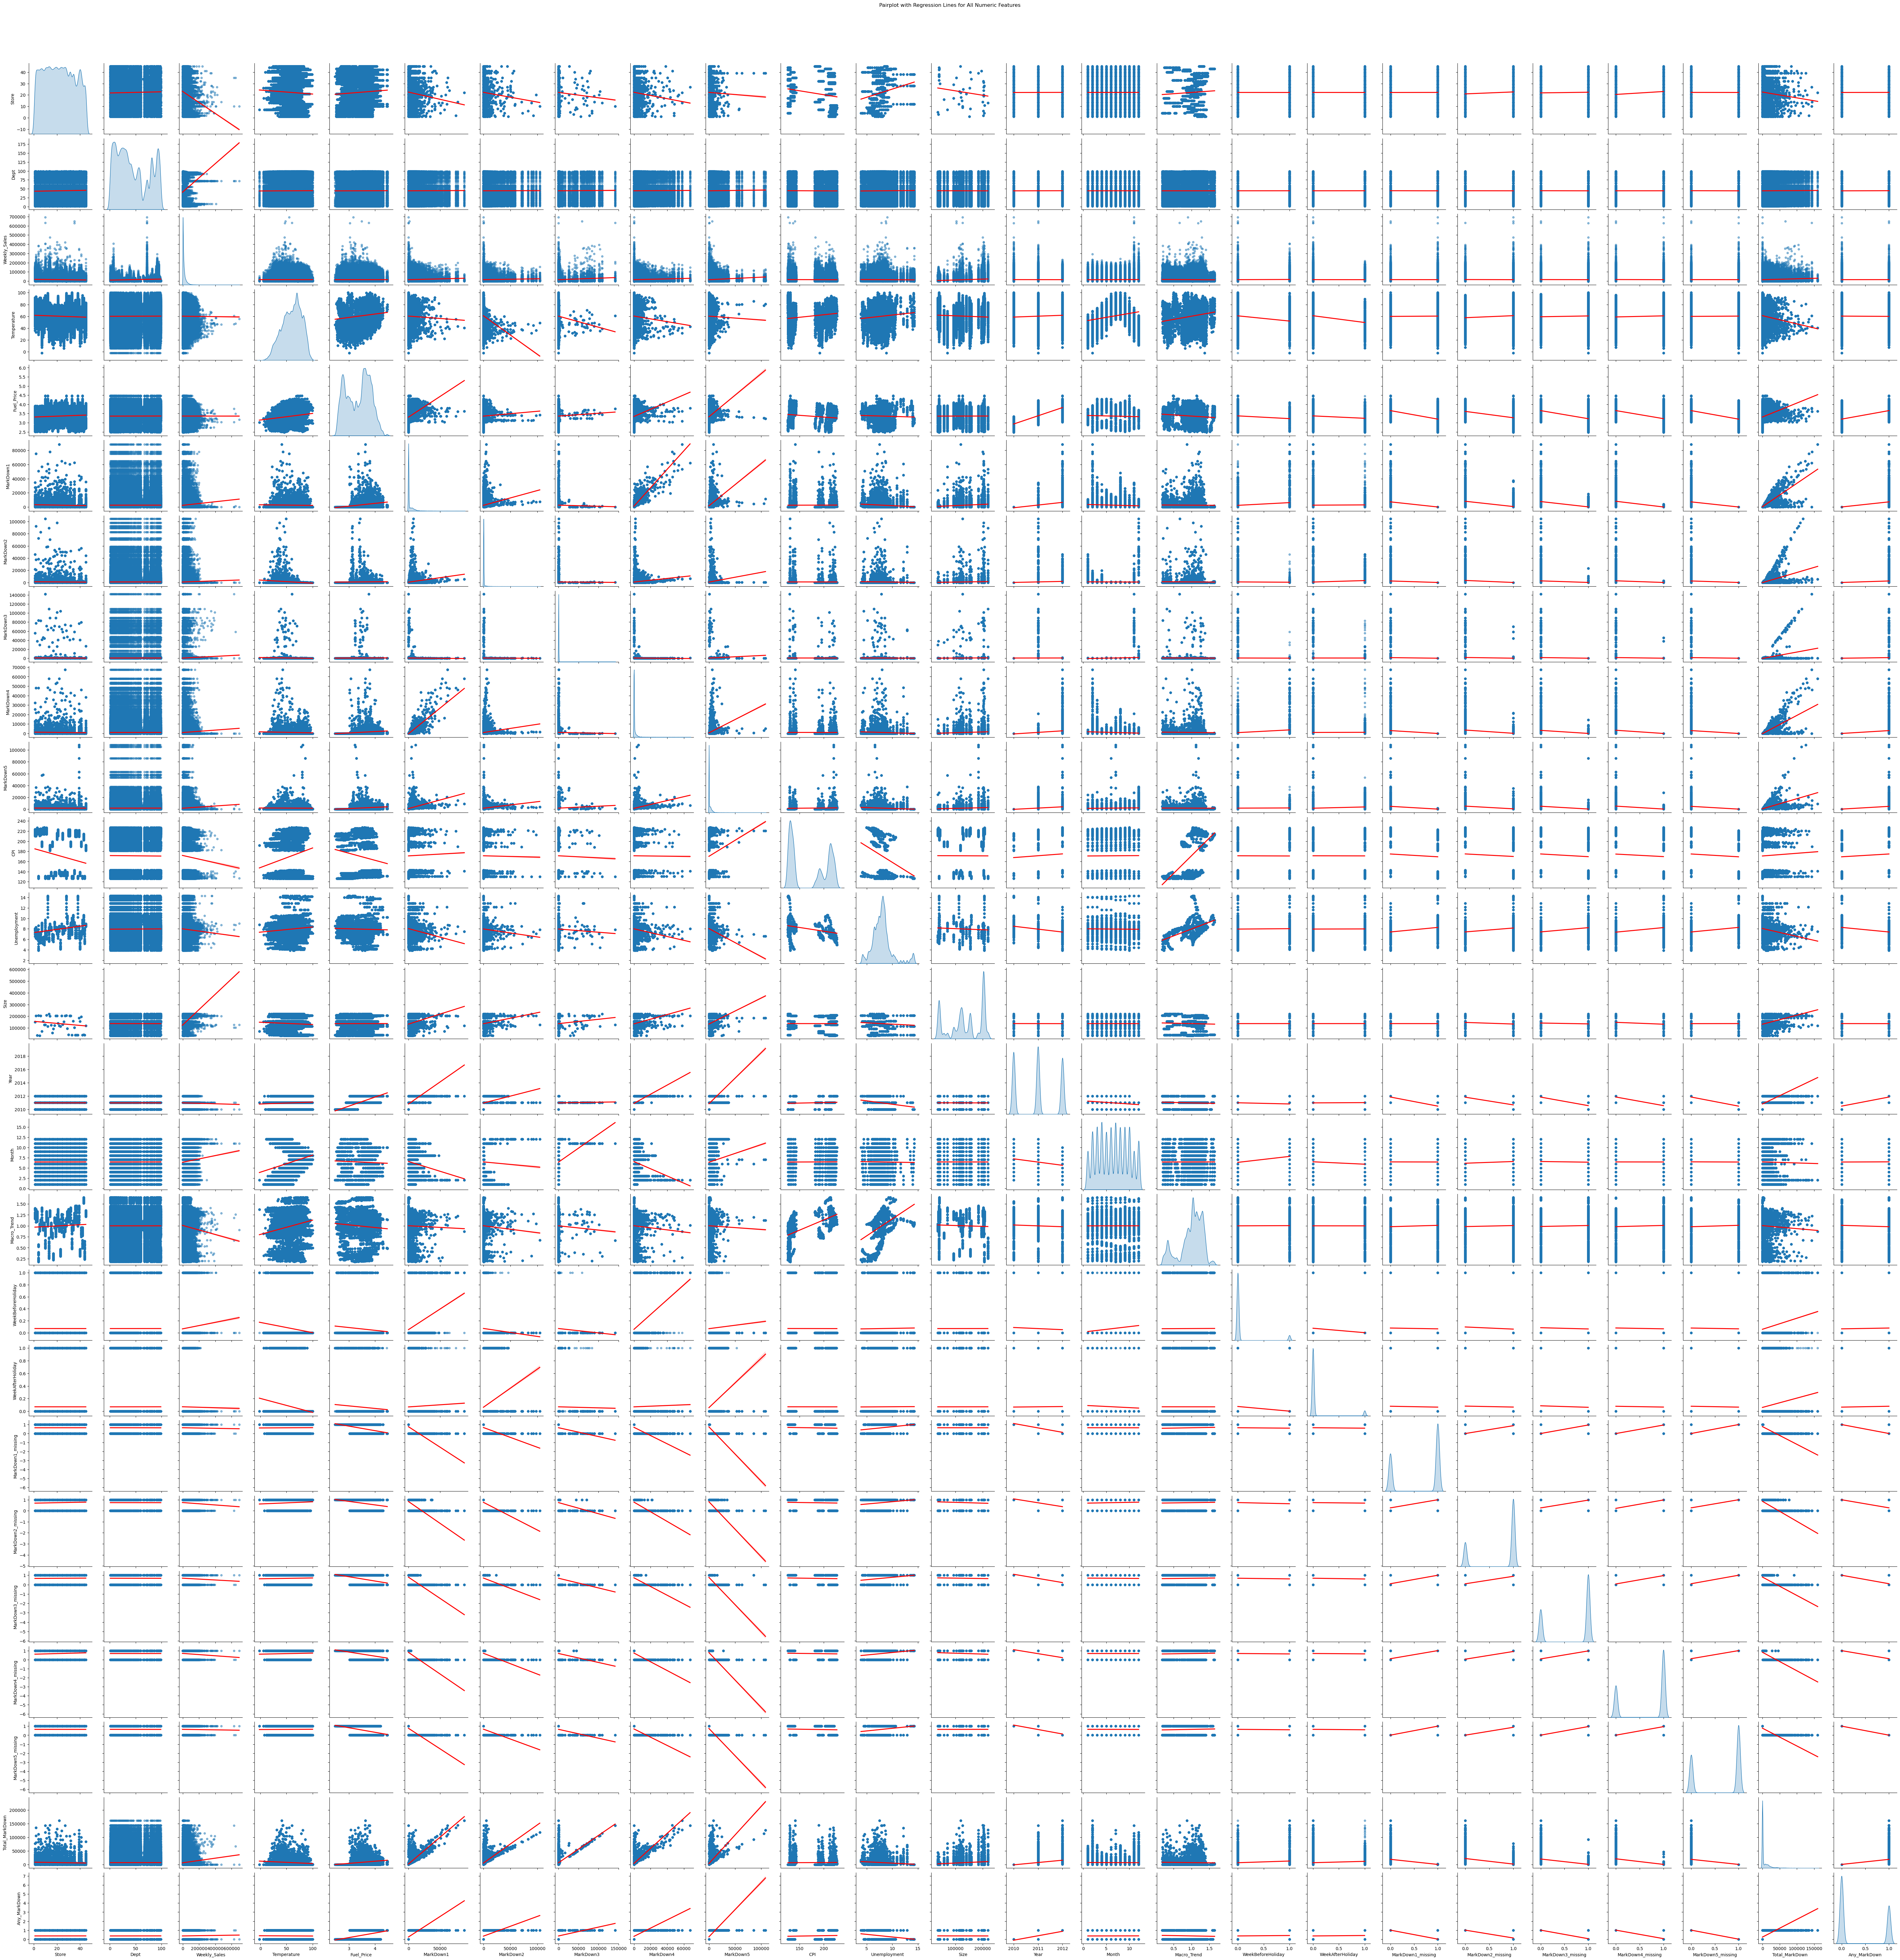

In [12]:
sns.pairplot(data=df[numeric_cols], kind="reg", diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.5, "s": 20}})
plt.suptitle("Pairplot with Regression Lines for All Numeric Features", y=1.02)
plt.show()

In [83]:
cat_cols = ["Store", "Dept", "Type"]

In [84]:
from sklearn.preprocessing import LabelEncoder

df_label_train=df_train.copy()
df_label_test=df_test.copy()

label_encoders={}

for col in cat_cols:
    le=LabelEncoder()
    df_label_train[col] = le.fit_transform(df_label_train[col].astype(str))
    df_label_test[col] = le.transform(df_label_test[col].astype(str))
    label_encoders[col] = le


In [85]:
df_label_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      0     0  2010-02-05      24924.50        False        42.31   
1      0     0  2010-02-12      46039.49         True        38.51   
2      0     0  2010-02-19      41595.55        False        39.93   
3      0     0  2010-02-26      19403.54        False        46.63   
4      0     0  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Macro_Trend  \
0       2.572        0.0        0.0        0.0  ...     1.296640   
1       2.548        0.0        0.0        0.0  ...     1.303976   
2       2.514        0.0        0.0        0.0  ...     1.306097   
3       2.561        0.0        0.0        0.0  ...     1.306874   
4       2.625        0.0        0.0        0.0  ...     1.308197   

   WeekBeforeHoliday  WeekAfterHoliday  MarkDown1_missing  MarkDown2_missing  \
0                  1                 0                  1                  1   
1                  0                 0                  1                  1   
2                  0                 1                  1                  1   
3                  0                 0                  1                  1   
4                  0                 0                  1                  1   

   MarkDown3_missing  MarkDown4_missing  MarkDown5_missing  Total_MarkDown  \
0                  1                  1                  1             0.0   
1                  1                  1                  1             0.0   
2                  1                  1                  1             0.0   
3                  1                  1                  1             0.0   
4                  1                  1                  1             0.0   

   Any_MarkDown  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 29 columns]

In [86]:
df_label_test.head()

Store  Dept        Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0      0     0  02-11-2012        False        55.32       3.386    6766.44   
1      0     0  09-11-2012        False        61.24       3.314   11421.32   
2      0     0  16-11-2012        False        52.92       3.252    9696.28   
3      0     0  23-11-2012         True        56.23       3.211     883.59   
4      0     0  30-11-2012        False        52.34       3.207    2460.03   

   MarkDown2  MarkDown3  MarkDown4  ...  Macro_Trend  WeekBeforeHoliday  \
0    5147.70      50.82    3639.90  ...     1.245332                  0   
1    3370.89      40.28    4646.79  ...     1.249649                  0   
2     292.10     103.78    1133.15  ...     1.252757                  1   
3       4.17   74910.32     209.91  ...     1.253687                  0   
4       0.00    3838.35     150.57  ...     1.260156                  0   

   WeekAfterHoliday  MarkDown1_missing  MarkDown2_missing  MarkDown3_missing  \
0                 0                  0                  0                  0   
1                 0                  0                  0                  0   
2                 0                  0                  0                  0   
3                 0                  0                  0                  0   
4                 1                  0                  1                  0   

   MarkDown4_missing  MarkDown5_missing  Total_MarkDown  Any_MarkDown  
0                  0                  0        18342.28             1  
1                  0                  0        25633.44             1  
2                  0                  0        17838.00             1  
3                  0                  0        76311.31             1  
4                  0                  0        13415.29             1  

[5 rows x 28 columns]

In [87]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df_ohe_train = df_train.copy()
df_ohe_test  = df_test.copy()

ohe = OneHotEncoder(
    handle_unknown="ignore", 
    sparse_output=True
)

X_train_ohe = ohe.fit_transform(df_ohe_train[cat_cols])
X_test_ohe  = ohe.transform(df_ohe_test[cat_cols])
ohe_cols = ohe.get_feature_names_out(cat_cols)

X_train_ohe_df = pd.DataFrame(
    X_train_ohe.toarray(),
    columns=ohe_cols,
    index=df_ohe_train.index
)

X_test_ohe_df = pd.DataFrame(
    X_test_ohe.toarray(),
    columns=ohe_cols,
    index=df_ohe_test.index
)

df_ohe_train = df_ohe_train.drop(columns=cat_cols)
df_ohe_test  = df_ohe_test.drop(columns=cat_cols)

df_ohe_train = pd.concat([df_ohe_train, X_train_ohe_df], axis=1)
df_ohe_test  = pd.concat([df_ohe_test, X_test_ohe_df], axis=1)


In [88]:
df_ohe_train.head()

Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0  2010-02-05      24924.50        False        42.31       2.572        0.0   
1  2010-02-12      46039.49         True        38.51       2.548        0.0   
2  2010-02-19      41595.55        False        39.93       2.514        0.0   
3  2010-02-26      19403.54        False        46.63       2.561        0.0   
4  2010-03-05      21827.90        False        46.50       2.625        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5  ...  Dept_93  Dept_94  Dept_95  \
0        0.0        0.0        0.0        0.0  ...      0.0      0.0      0.0   
1        0.0        0.0        0.0        0.0  ...      0.0      0.0      0.0   
2        0.0        0.0        0.0        0.0  ...      0.0      0.0      0.0   
3        0.0        0.0        0.0        0.0  ...      0.0      0.0      0.0   
4        0.0        0.0        0.0        0.0  ...      0.0      0.0      0.0   

   Dept_96  Dept_97  Dept_98  Dept_99  Type_A  Type_B  Type_C  
0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
1      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
2      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
3      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
4      0.0      0.0      0.0      0.0     1.0     0.0     0.0  

[5 rows x 155 columns]

In [89]:
df_ohe_test.head()

Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0  02-11-2012        False        55.32       3.386    6766.44    5147.70   
1  09-11-2012        False        61.24       3.314   11421.32    3370.89   
2  16-11-2012        False        52.92       3.252    9696.28     292.10   
3  23-11-2012         True        56.23       3.211     883.59       4.17   
4  30-11-2012        False        52.34       3.207    2460.03       0.00   

   MarkDown3  MarkDown4  MarkDown5         CPI  ...  Dept_93  Dept_94  \
0      50.82    3639.90    2737.42  223.462779  ...      0.0      0.0   
1      40.28    4646.79    6154.16  223.481307  ...      0.0      0.0   
2     103.78    1133.15    6612.69  223.512911  ...      0.0      0.0   
3   74910.32     209.91     303.32  223.561947  ...      0.0      0.0   
4    3838.35     150.57    6966.34  223.610984  ...      0.0      0.0   

   Dept_95  Dept_96  Dept_97  Dept_98  Dept_99  Type_A  Type_B  Type_C  
0      0.0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
1      0.0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
2      0.0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
3      0.0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  
4      0.0      0.0      0.0      0.0      0.0     1.0     0.0     0.0  

[5 rows x 154 columns]

In [90]:
print((df_train["Weekly_Sales"] < 0).sum())

1285


In [93]:
numeric_cols_train = df_train.select_dtypes(include=["number"]).columns
(df_train[numeric_cols_train]<0).sum()

Store                   0
Dept                    0
Weekly_Sales         1285
Temperature            69
Fuel_Price              0
MarkDown1               0
MarkDown2            1311
MarkDown3             257
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Size                    0
Year                    0
Month                   0
Weekoftheyear           0
Macro_Trend             0
WeekBeforeHoliday       0
WeekAfterHoliday        0
MarkDown1_missing       0
MarkDown2_missing       0
MarkDown3_missing       0
MarkDown4_missing       0
MarkDown5_missing       0
Total_MarkDown          0
Any_MarkDown            0
dtype: int64

In [96]:
numeric_cols_test = df_test.select_dtypes(include=["number"]).columns
(df_test[numeric_cols_test]<0).sum()

Store                  0
Dept                   0
Temperature          208
Fuel_Price             0
MarkDown1            207
MarkDown2            412
MarkDown3            589
MarkDown4              0
MarkDown5            136
CPI                    0
Unemployment           0
Size                   0
Year                   0
Month                  0
Weekoftheyear          0
Macro_Trend            0
WeekBeforeHoliday      0
WeekAfterHoliday       0
MarkDown1_missing      0
MarkDown2_missing      0
MarkDown3_missing      0
MarkDown4_missing      0
MarkDown5_missing      0
Total_MarkDown        93
Any_MarkDown           0
dtype: int64

In [126]:
df_ohe_train["Weekly_Sales"] = df_ohe_train["Weekly_Sales"].clip(lower=0)
df_label_train["Weekly_Sales"] = df_label_train["Weekly_Sales"].clip(lower=0)

y1 = np.log1p(df_ohe_train["Weekly_Sales"])
y2 = np.log1p(df_label_train["Weekly_Sales"])

In [98]:
df_ohe_train["IsHoliday_x"] = df_ohe_train["IsHoliday_x"].astype(int)
df_label_train["IsHoliday_x"] = df_label_train["IsHoliday_x"].astype(int)
df_ohe_test["IsHoliday_x"] = df_ohe_test["IsHoliday_x"].astype(int)
df_label_test["IsHoliday_x"] = df_label_test["IsHoliday_x"].astype(int)

In [99]:
df_ohe_train["Size"] = np.log1p(df_ohe_train["Size"])
df_label_train["Size"] = np.log1p(df_label_train["Size"])
df_ohe_test["Size"] = np.log1p(df_ohe_test["Size"])
df_label_test["Size"] = np.log1p(df_label_test["Size"])

In [102]:
for df in [df_train, df_test,df_ohe_train,df_ohe_test,df_label_train,df_label_test]:
    df["Total_MarkDown"] = df["Total_MarkDown"].clip(lower=0)
    df["Total_MarkDown"] = np.log1p(df["Total_MarkDown"])
    print((df["Total_MarkDown"]<0).sum())

0
0
0
0
0
0


In [ ]:
drop_cols = [
    "Weekly_Sales",      # target
    "MarkDown1",
    "MarkDown2",
    "MarkDown3",
    "MarkDown4",
    "MarkDown5",
    "Date"
]
X_train_ohe=df_ohe_train.drop(columns=drop_cols, errors="ignore")
X_test_ohe=df_ohe_test.drop(columns=drop_cols, errors="ignore")
print(X_train_ohe.shape)
print(X_test_ohe.shape)
print(X_train_ohe.columns)
print(X_test_ohe.columns)

(421570, 148)
(115064, 148)
Index(['IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Size', 'Year', 'Month', 'Weekoftheyear', 'Macro_Trend',
       ...
       'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98',
       'Dept_99', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object', length=148)
Index(['IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Size', 'Year', 'Month', 'Weekoftheyear', 'Macro_Trend',
       ...
       'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98',
       'Dept_99', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object', length=148)


In [124]:
X_train_label=df_label_train.drop(columns=drop_cols, errors="ignore")
X_test_label=df_label_test.drop(columns=drop_cols, errors="ignore")
print(X_train_label.shape)
print(X_test_label.shape)
print(X_train_label.columns)
print(X_test_label.columns)

(421570, 22)
(115064, 22)
Index(['Store', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Weekoftheyear',
       'Macro_Trend', 'WeekBeforeHoliday', 'WeekAfterHoliday',
       'MarkDown1_missing', 'MarkDown2_missing', 'MarkDown3_missing',
       'MarkDown4_missing', 'MarkDown5_missing', 'Total_MarkDown',
       'Any_MarkDown'],
      dtype='object')
Index(['Store', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Weekoftheyear',
       'Macro_Trend', 'WeekBeforeHoliday', 'WeekAfterHoliday',
       'MarkDown1_missing', 'MarkDown2_missing', 'MarkDown3_missing',
       'MarkDown4_missing', 'MarkDown5_missing', 'Total_MarkDown',
       'Any_MarkDown'],
      dtype='object')


In [105]:
assert list(X_train_ohe.columns) == list(X_test_ohe.columns)
assert X_train_ohe.isna().sum().sum() == 0
assert X_test_ohe.isna().sum().sum() == 0

In [ ]:
assert list(X_train_label.columns)==list(X_test_label.columns)
assert X_train_label.isna().sum().sum()==0
assert X_test_label.isna().sum().sum()==0

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_ohe = scaler.fit_transform(X_train_ohe)
X_test_scaled_ohe  = scaler.transform(X_test_ohe)

In [143]:
def evaluate_model(model, X, y_log, cv):
    r2s, maes, mses, rmses = [], [], [], []

    is_pandas_X = hasattr(X, "iloc")
    is_pandas_y = hasattr(y_log, "iloc")

    for fold, (tr_idx, val_idx) in enumerate(cv.split(X)):
        # X indexing
        if is_pandas_X:
            X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        else:
            X_tr, X_val = X[tr_idx], X[val_idx]

        # y indexing
        if is_pandas_y:
            y_tr, y_val = y_log.iloc[tr_idx], y_log.iloc[val_idx]
        else:
            y_tr, y_val = y_log[tr_idx], y_log[val_idx]

        model.fit(X_tr, y_tr)

        # predict in log-space
        y_pred_log = model.predict(X_val)

        # inverse transform
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y_val)

        r2s.append(r2_score(y_true, y_pred))
        maes.append(mean_absolute_error(y_true, y_pred))
        mses.append(mean_squared_error(y_true, y_pred))
        rmses.append(np.sqrt(mean_squared_error(y_true, y_pred)))

    return {
        "R2": np.mean(r2s),
        "MAE": np.mean(maes),
        "MSE": np.mean(mses),
        "RMSE": np.mean(rmses)
    }


In [117]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

model = Ridge(alpha=0.1)

metrics = evaluate_model(
    model,
    X_train_scaled_ohe,
    y1,          # log1p target
    tscv
)

print(metrics)


{'R2': 0.5328705293674533, 'MAE': 7868.17560602655, 'MSE': 221415513.14322346, 'RMSE': 14725.01410139277}


In [122]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(
    alpha=0.01,
    l1_ratio=0.6,
    max_iter=5000,
    random_state=42
)

metrics = evaluate_model(
    model,
    X_train_scaled_ohe,
    y1,
    tscv
)

print(metrics)


{'R2': 0.5679960657315721, 'MAE': 7455.700940494969, 'MSE': 206484448.88797447, 'RMSE': 14182.155842376462}


In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=15,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
metrics = evaluate_model(rf, X_train_label, y2, tscv)
print(metrics)

{'R2': 0.5970333540344867, 'MAE': 7495.0152794662645, 'MSE': 190785132.021733, 'RMSE': 13707.489618075968}


In [144]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=14,
    min_samples_leaf=10,
    min_samples_split=20,
    max_features=0.3,
    max_samples=0.8,
    bootstrap=True,
    ccp_alpha=0.0005,
    n_jobs=-1,
    random_state=42
)
metrics = evaluate_model(rf, X_train_scaled_ohe, y1, tscv)
print(metrics)

{'R2': 0.2486244778632229, 'MAE': 10826.933943433885, 'MSE': 367589379.1930932, 'RMSE': 18862.900061819375}


In [158]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=2500,          # upper bound, early stopping will cut it
    learning_rate=0.03,
    max_depth=5,
    min_child_weight=5,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=1.0,
    reg_lambda=1.0,
    objective="reg:squarederror",
    tree_method="hist",         # faster on CPU
    n_jobs=-1,
    random_state=42
)
metrics_xgb = evaluate_model(
    xgb,
    X_train_label,     # pandas or numpy, both fine
    y2,
    tscv
)

print(metrics_xgb)

{'R2': 0.7013868683837998, 'MAE': 6232.300599592587, 'MSE': 148364294.94943208, 'RMSE': 11786.682592899535}


In [170]:
import pandas as pd
import numpy as np

# 1. Fit on full training data
xgb.fit(X_train_label, y2)

# 2. Predict on test data
y_test_pred_log = xgb.predict(X_test_label)

# 3. Inverse transform ONLY if y2 was log1p
y_test_pred = np.expm1(y_test_pred_log)

# ---------- HARD VALIDATIONS ----------
assert len(y_test_pred) == 115064, "Prediction row count mismatch"

# ---------- DATE FIX (CRITICAL) ----------
# Original format: DD-MM-YYYY
df_test["Date"] = pd.to_datetime(
    df_test["Date"],
    format="%d-%m-%Y",
    errors="raise"
).dt.strftime("%Y-%m-%d")

# ---------- COMBINED KEY ----------
combined_key = (
    df_test["Store"].astype(str) + "_" +
    df_test["Dept"].astype(str) + "_" +
    df_test["Date"]
)

# ---------- FINAL OUTPUT ----------
output_df = pd.DataFrame({
    "Id": combined_key,
    "Weekly_Sales": y_test_pred
})

# ---------- NaN GUARD (NON-NEGOTIABLE) ----------
assert output_df.isna().sum().sum() == 0, "NaNs detected in output"
assert len(output_df) == 115064, "Final output row count mismatch"

# ---------- WRITE FILE ----------
output_df.to_csv("xgb_predictions_final_pls.csv", index=False)

print("✅ File written successfully: xgb_predictions_final.csv")


✅ File written successfully: xgb_predictions_final.csv


In [166]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=10,
    max_features=0.7,
    n_jobs=-1,
    random_state=42
)

metrics_etr = evaluate_model(
    etr,
    X_train_label,
    y2,
    tscv
)

print(metrics_etr)


{'R2': 0.5771458990208261, 'MAE': 7386.3857957536775, 'MSE': 209382835.0277477, 'RMSE': 14074.416488039118}
